# *Preliminary design on sheet*

# Step 1) choosing of core material

Depending on switching frequency which is at least 100kHz, "Ferrite Core" is suitable for application.
This is because of the fact that "Relative Core Loss" of ferrite is low other than of powdered cores,laminations iron&silicon steel.
My referrence is the notes on EE361.

# Step 2) choosing of operating Flux Density depending on determined material

Commonly, manganese-zinc ferrites are used. These ferrites offers very low coercivity, that means the material's magnetization can easily reverse direction without dissipating much energy (hysteresis losses), even they do not need core lamination to reduce “Eddy Current” losses as the Powder core itself offers High resistance.

Choose Bmax = 0.35T, Bsat = 0.5T is the determination for ferrite core.

In [125]:
Bm=0.35;
Bsat=0.5;

# Step 3) determination of minimum required N1.Ac product

V1rms=4*Bsat*Ac*N*f*e-8 #For square wave operated transformers

In [126]:
Bm=0.35;#in units of tesla
Bmgau=0.35*1e4; #in units of gauss
Bsat=0.5; #in units of tesla
Bsatgau=0.5*1e4;  #in units of gauss
V1=417; #applied peak voltage to primary winding
V1rms=417; #applied rms voltage to primary winding
V2=12500; #obtained peak voltage at secondary winding
V2rms=12500; #applied rms voltage to primary winding
Pout=30000; #rated output power
fsw=100000; #switching frequency of transformer
fswmax=500000; #maksimum switching frequency of transformer
pi=3.141592;
a=V1/V2 #turns ratio of transformer
N1Ac=(V1rms*1e8)/(Bsatgau*fsw*4);
print (N1Ac)#minimum required N1.Ac product for designed transformer
print("The minimum required N1.AC product is",N1Ac)
#Ac will be determined by chosen core,therefore N1 will be calculated from this product

20.85
The minimum required N1.AC product is 20.85


# Step 4) choosing of core material & geometry

Here, we will calculate the required "power handling capacity" of the core. From this calculated value and by the help of the catalogues, the required core material and geometry will be chosen.

Power handling capacity is the product of Wa(window area) and Ac (core area).

In [127]:
C=5.07e-3; #current capacity in cm2/ampere
e=0.95; #efficiency of the transformer
K=0.3; #winding factor
WaAc=(Pout*C*1e8)/(4*e*Bsatgau*fsw*K)
print (WaAc)
print("The required power handling capacity is",WaAc,"in units of cm^4")

26.68421052631579
The required power handling capacity is 26.68421052631579 in units of cm^4


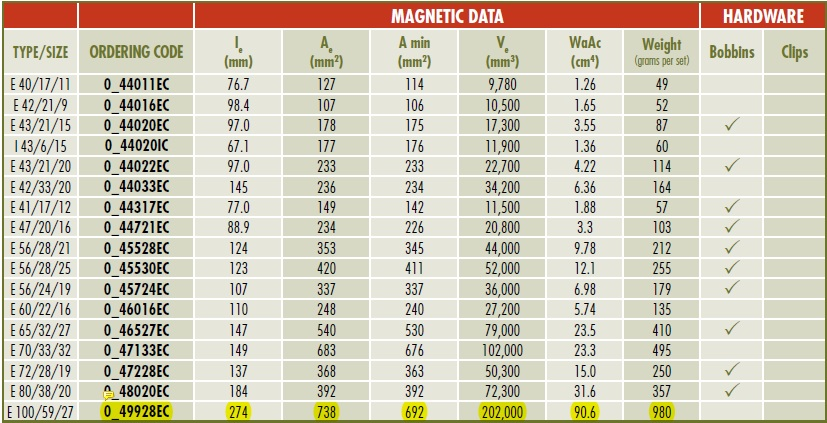

In [128]:
from IPython.display import Image 
Image(filename='core.jpg')

Required WaAc is calculated. From the ferrite core catalogue, "49928EE" ferrite core is suitable for application, because it has 90.6 WaAc product. "EE" corresponds double E configuration for transformer. Material type determines AL value of the core and choosing as high yields high inductance with low turns at windings. P type material can be choosen from catalogue. It is a little higher than required WaAc product,but when i checked the catalogue. I have seen that double EE core for whose WaAc value is lower than 90.6 can not handle 26.5kW power lower than 100kHz. It is also below the rated  power for 100kHz, but by considering the operation time of the transformer, it would be enough for our reuqirements. Addition to this,by considering the operation frequency which will be 100kHz as minimum and considering the core's capacity @250kHz operation which is at 51.6kW. This core material and WaAc product is optimum for the design.

Core datas are shown below. It was taken from the link, https://www.mag-inc.com/

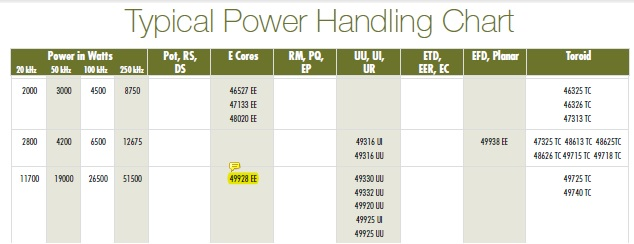

In [129]:
from IPython.display import Image 
Image(filename='power capacity.jpg')

In [130]:
#...................49928, P material, ferrite core was chosen..........................#
WaAc=90.6; #cm^4
AL=6.773e-6; #H/turn for P type material
le=274; #in mm,effective length
Ac=738; #in mm2,effective cross sectional area
Accm2=Ac/1e2; #in cm2,effective cross sectional area
Wa=WaAc/Accm2;
Ve=202000; #mm3
Weight=980; #grams per set of the core
#lengths of the parts of the cores are at below.
A=100.3; #in units of mm
B=59.4;#in units of mm
C=27.5;#in units of mm
D=46.85;#in units of mm
E=72;#in units of mm
F=27.5;#in units of mm
L=13.75;#in units of mm
M=22.65;#in units of mm

# Step 5) determining the number of turns 

Number of turns determination will be done by N1.Ac product and the Ac determined by core cross-sectional area.

In [131]:
N1=(N1Ac)/(Accm2); # The N1Ac changed cm2 to mm2
print (N1)
N1opt=round (N1);
print (N1opt)
print("The optimum number of turns for primary winding is",N1opt)

2.8252032520325208
3
The optimum number of turns for primary winding is 3


Now, go on by determining the turns number of secondary winding

In [132]:
N2=N1/a;
print (N2)
N2opt=round (N2);
print (N2opt)
print("The optimum number of turns for primary winding is",N2opt)

84.68834688346885
85
The optimum number of turns for primary winding is 85


# Step 6) determine core total window area

In [133]:
core_window_area=2*D*M*2;
core_window_areacm2=core_window_area/100;
print("The obtained core total windows area is",core_window_areacm2,"in units of cm^2")

The obtained core total windows area is 42.446099999999994 in units of cm^2


# Step 7) determining the winding conductor sizes

Now,there should be determation of secondary current of transformer, and then primary current of the transformer.

In [134]:
I2rms=Pout/V2rms;
#in units of Amper
print("The secondary rms current is",I2rms,"in units of amps.")

The secondary rms current is 2.4 in units of amps.


Now,there should be determation of primary current of the transformer by using turns ratio.

In [135]:
I1rms=I2rms/a;
print("The primary rms current is",I1rms,"in units of amps")

The primary rms current is 71.94244604316546 in units of amps


Now, we should specify the current density "J" in units of "A/mm2". The general approach for current density is 3A/mm2.

Now,i will determine conductor cross sectional area,"CAc_I2", for secondary current and primary current which is "CAc_I1".

In [136]:
j=3; #current density in units of A/mm2
CAc_I2=I2rms/j;
print (CAc_I2);#in units of mm2
radius_square_Cac_I2=CAc_I2/pi;
radius_CAc_I2=radius_square_Cac_I2**(1/2);
diameter_CAc_I2=radius_CAc_I2*2;
print (diameter_CAc_I2); #in units of mm

0.7999999999999999
1.0092531137926435


In [137]:
CAc_I1=I1rms/j;
print (CAc_I1); #in units of mm2

23.98081534772182


Depending on found "CAc_I1","CAc_I2", i should determine skin depth to check the applicability. It is thought that circular wire was chosen.

In [138]:
skdp=0.066/(fswmax**(1/2)); #skin depth in units of m. By thinking of pure "COPPER" was chosen.
skdpmm=skdp*1e3; #skin depth in units of mm
print (skdpmm);

0.09333809511662428


In [139]:
Area_AWG3=26.7;#in units of mm2 for primary current
Area_AWG18=0.823;#in units of mm2 for primary current
radius_square_AWG18=Area_AWG18/pi;
radius_AWG18=radius_square_AWG18**(1/2);
diameter_AWG18=radius_AWG18*2;
print (diameter_AWG18);

1.0236583235247618


AWG18 and AWG3 cables have chosen according only to checking the current density. However,the skin depth is so much lower than the diameter of AWG18. This means that it is not necessary to use such kind of a conductor. I will decrease the cable cross sectional area.

In [140]:
Area_AWG33=0.0254;#in units of mm2
radius_square_AWG33=Area_AWG33/pi;
radius_AWG33=radius_square_AWG33**(1/2);
diameter_AWG33=radius_AWG33*2;
print (diameter_AWG33);

0.17983406563963253


Now,AWG33 is nearly equal to skindepth.I should check whether i can use this winding by considering current passing through the conductor.

In [141]:
required_number_parallel_secondary=CAc_I2/Area_AWG33;
print (required_number_parallel_secondary); #required number of parallel windings for secondary windings

31.49606299212598


To use AWG33 for secondary winding, i should make 32xparallel with 3 number of turns.Lets check whether the core window area has enough area for secondary winding.

In [142]:
kw=0.3; #winding factor for E geometry cores
rqrd_area_scndry=Area_AWG33*required_number_parallel_secondary*N2opt/kw; #AWG in units of mm2
rqrd_area_scndrycm2=rqrd_area_scndry/100;
print("The required window area for secondary windings",rqrd_area_scndrycm2,"in units of cm2");

The required window area for secondary windings 2.266666666666667 in units of cm2


Now,i will calculate the required window are for primary winding.

In [143]:
required_number_parallel_primary=CAc_I1/Area_AWG33;
print("The required number of parallel windings for secondary windings",required_number_parallel_primary);
rqrd_area_primary=Area_AWG33*required_number_parallel_primary*N1opt/kw; #AWG in units of mm2
rqrd_area_primarycm2=rqrd_area_primary/100;
print("The required window area for primary windings",rqrd_area_primary,"in units of mm2");
print("The required window area for primary windings",rqrd_area_primarycm2,"in units of cm2");

The required number of parallel windings for secondary windings 944.1265884929851
The required window area for primary windings 239.8081534772182 in units of mm2
The required window area for primary windings 2.398081534772182 in units of cm2


In [144]:
print("The required window area for primary windings",rqrd_area_primarycm2,"in units of cm2");
print("The required window area for secondary windings",rqrd_area_scndrycm2,"in units of cm2");
print("The obtained core total windows area is",core_window_areacm2,"in units of cm^2");

The required window area for primary windings 2.398081534772182 in units of cm2
The required window area for secondary windings 2.266666666666667 in units of cm2
The obtained core total windows area is 42.446099999999994 in units of cm^2


# Step 8) finding the losses and efficiency 

# > Step 8.1) finding the copper losses

In [145]:
required_number_parallel_secondaryopt=round(required_number_parallel_secondary)
required_number_parallel_primaryopt=round(required_number_parallel_primary)
print("The primary number of turns",N1opt," and the primary number of parallel windings",required_number_parallel_primaryopt )
print("The secondary number of turns",N2opt," and the secondary number of parallel windings",required_number_parallel_secondaryopt )

The primary number of turns 3  and the primary number of parallel windings 944
The secondary number of turns 85  and the secondary number of parallel windings 31


In [146]:
winding_primary=N1opt*required_number_parallel_primaryopt;
print (winding_primary);
N1st=2*D/(diameter_AWG33);
print (N1st);
total_winding=(winding_primary)/N1st;
print (total_winding);
print("Number of ",total_winding,"fullturn is needed to totally wind primary")
length_primary=(2*pi*(F/2))*N1st+(2*pi*((F/2)+diameter_AWG33)*N1st)+(2*pi*((F/2)+diameter_AWG33*2)*N1st);
length_primary_con=(2*pi*((F/2)+diameter_AWG33*3)*N1st)+(2*pi*((F/2)+diameter_AWG33*4)*N1st);
length_primary_continue=((2*pi*((F/2)+diameter_AWG33*5)*N1st)*(1/0.4352));
total_length_primary=length_primary+length_primary_con+length_primary_continue;
print("Total length for primary winding",total_length_primary,"in units of mm");
total_length_primary

2832
521.0358764160089
5.4353262955329695
Number of  5.4353262955329695 fullturn is needed to totally wind primary
Total length for primary winding 341156.0885925436 in units of mm


341156.0885925436

This conductor length is too high to design,because it will cause absolutely large copper losses.Also it has definitely low cross sectional area. Therefore, the optimazation is required to determine AWG of windings.

# > Step 8.2) obtimazing copper losses by changing conductor

# >> Step 8.2.1) obtimazing copper losses by changing of primary conductor

I will try to use the previously obtained configurations for secondary and primary windings.
AWG3 for primary winding and AWG18 for secondary winding will be checked by taking into account the skin depth.

In [147]:
print (skdpmm); #in units of mm
#Starting with primary side.
#Area_AWG3=26.7;#in units of mm2 for primary current
#Area_AWG18=0.823;#in units of mm2 for primary current
radius_square_AWG3=Area_AWG3/pi;
radius_AWG3=radius_square_AWG3**(1/2);
diameter_AWG3=radius_AWG3*2;
print (diameter_AWG3);
wastedarea_primary=pi*((radius_AWG3-skdpmm)**2)
totalarea_primary=pi*(radius_AWG3**2);
effectivearea_primary=totalarea_primary-wastedarea_primary;

0.09333809511662428
5.830566260406651


In [148]:
required_number_parallel_primary_new=CAc_I1/effectivearea_primary;
required_number_parallel_primaryopt_new=round(required_number_parallel_primary_new);
print ("The required number of parallel windings for primary windings", required_number_parallel_primaryopt_new); 

The required number of parallel windings for primary windings 14


In [149]:
winding_primary_new=N1opt*required_number_parallel_primaryopt_new;
print (winding_primary_new);
N1st_new=2*D/(diameter_AWG3);
print (N1st_new);
total_winding_new=(winding_primary_new)/N1st_new;
print (total_winding_new);
print("Number of ",total_winding_new,"fullturn is needed to totally wind primary")
length_primary_new=(2*pi*(F/2))*N1st_new+(2*pi*((F/2)+diameter_AWG3*1)*N1st_new);
length_primary_continue_new=((2*pi*((F/2)+diameter_AWG3*2)*N1st_new)*(0.613));
total_length_primary_new=length_primary_new+length_primary_continue_new;
print("Total length for primary winding new is",total_length_primary_new,"in units of mm");
total_length_primary_new_m=total_length_primary_new/100;#in units of meter
print("Total length for primary winding new is",total_length_primary_new_m,"in units of m");

42
16.070480261288537
2.613487544686012
Number of  2.613487544686012 fullturn is needed to totally wind primary
Total length for primary winding new is 4938.384500680317 in units of mm
Total length for primary winding new is 49.38384500680317 in units of m


# >> Step 8.2.2) obtimazing copper losses by changing of secondary conductor

In [150]:
print (skdpmm); #in units of mm
#Going on with secondary side.
#Area_AWG3=26.7;#in units of mm2 for primary current
#Area_AWG18=0.823;#in units of mm2 for primary current
radius_square_AWG18=Area_AWG18/pi;
radius_AWG18=radius_square_AWG18**(1/2);
diameter_AWG18=radius_AWG18*2;
print (diameter_AWG18);
wastedarea_secondary=pi*((radius_AWG18-skdpmm)**2)
totalarea_secondary=pi*(radius_AWG18**2);
effectivearea_secondary=totalarea_secondary-wastedarea_secondary;

0.09333809511662428
1.0236583235247618


In [151]:
required_number_parallel_secondary_new=CAc_I2/effectivearea_secondary;
required_number_parallel_secondaryopt_new=round(required_number_parallel_secondary_new);
print ("The required number of parallel windings for secondary windings", required_number_parallel_secondaryopt_new); 

The required number of parallel windings for secondary windings 3


In [152]:
winding_secondary_new=N2opt*required_number_parallel_secondaryopt_new;
print("Total winding turn for secondary winding new is",winding_secondary_new)
N2st_new=2*D/(diameter_AWG18);
print (N2st_new);
total_winding_secondary_new=(winding_secondary_new)/N2st_new;
print (total_winding_secondary_new);
print("Number of ",total_winding_secondary_new,"fullturn is needed to totally wind secondary")
length_secondary_new=(2*pi*(((F/2)+diameter_AWG18*3)+diameter_AWG3*1)*N2st_new);
length_secondary_new_cont=(2*pi*(((F/2)+diameter_AWG18*3)+diameter_AWG3*2)*N2st_new);
length_secondary_new_continue=(2*pi*(((F/2)+diameter_AWG18*3)+diameter_AWG3*3)*N2st_new)*(0.7858);
total_length_secondary_new=length_secondary_new+length_secondary_new_cont+length_secondary_new_continue;
print("Total length for secondary winding new is",total_length_secondary_new,"in units of mm");
total_length_secondary_new_m=total_length_secondary_new/100;#in units of meter
print("Total length for secondary winding new is",total_length_secondary_new_m,"in units of m");


Total winding turn for secondary winding new is 255
91.53444840595138
2.785836419411038
Number of  2.785836419411038 fullturn is needed to totally wind secondary
Total length for secondary winding new is 44915.494267539456 in units of mm
Total length for secondary winding new is 449.1549426753946 in units of m


# > Step 8.3) finding the copper losses with optimized conductors

In [153]:
AWG3_res=0.6465e-3; #ohm/meter
AWG18_res=20.95e-3; #ohm/meter
Rpri_1x_length=total_length_primary_new_m/required_number_parallel_primaryopt_new;
Rpri_1x=Rpri_1x_length*AWG3_res
Rpri_equi=Rpri_1x/required_number_parallel_primaryopt_new;
print("Total equivalent resistance of primary winding new is",Rpri_equi,"in units of ohm");
Rsec_1x_length=total_length_secondary_new_m/required_number_parallel_secondaryopt_new;
Rsec_1x=Rsec_1x_length*AWG18_res
Rsec_equi=Rsec_1x/required_number_parallel_secondaryopt_new;
print("Total equivalent resistance of secondary winding new is",Rsec_equi,"in units of ohm");

Total equivalent resistance of primary winding new is 0.00016289110100458295 in units of ohm
Total equivalent resistance of secondary winding new is 1.0455328943388353 in units of ohm


In [154]:
Ppri_copperloss=(I1rms**2)*Rpri_equi;
Psec_copperloss=(I2rms**2)*Rsec_equi;
print("Total equivalent copper loss of primary winding new is",Ppri_copperloss,"in units of Watts");
print("Total equivalent copper loss of secondary winding new is",Psec_copperloss,"in units of Watts");

Total equivalent copper loss of primary winding new is 0.8430780032326635 in units of Watts
Total equivalent copper loss of secondary winding new is 6.0222694713916916 in units of Watts


# > Step 8.4) finding termining the core loss

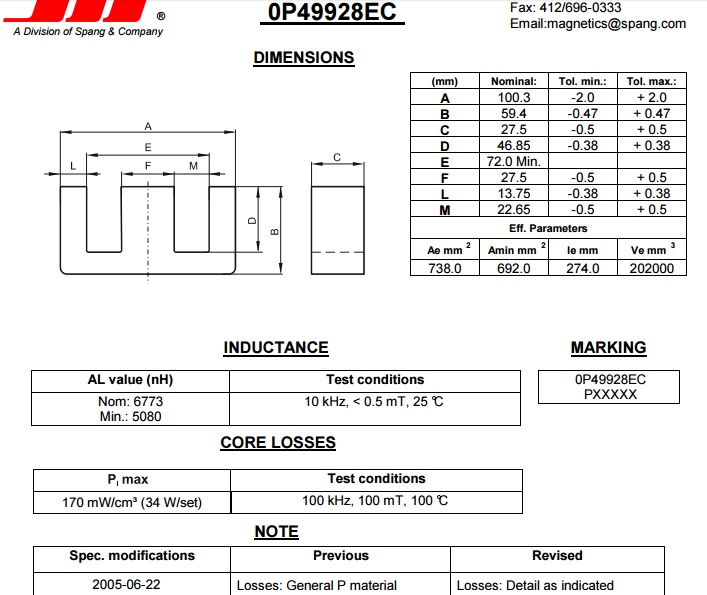

In [155]:
from IPython.display import Image 
Image(filename='49928.jpg')

In [156]:
from math import log
set=2; #for double EE configuration
Pcore_given=34; #W/set given from datasheet @100kHz,100mT,100C
Pcore_given_condition=Pcore_given*set; #W @100mT, it should be converted to Bmax(T)
Pcoreloss=Pcore_given_condition*log(500,10)/log(100,10);
print("Total equivalent coreloss of the material is",Pcoreloss,"in units of w");

Total equivalent coreloss of the material is 91.76498014742462 in units of w


# > Step 8.5) finding total loss and efficiency

In [157]:
totallosses=Pcoreloss+Ppri_copperloss+Psec_copperloss;
print("Total equivalent loss of the transformer is",totallosses,"in units of w");
efficiency=Pout/(Pout+totallosses);
print("Total efficiency of the transformer is",efficiency);

Total equivalent loss of the transformer is 98.63032762204898 in units of w
Total efficiency of the transformer is 0.9967230958170368


# > Step 8.6) finding the weight of the transformer

In [158]:
weightofcore=980;#grams/set
totalweightofcore=weightofcore*set;
totalweightofcorekg=totalweightofcore/1000;
print("Total weight of core is",totalweightofcorekg,"in units of kg");
AWG3_weightlb_1000ft=159.3;#lb/1000ft
AWG18_weightlb_1000ft=4.917;#lb/1000ft
#to change lb/1000ft to kg/km  1lb/1000ft=1.48816kg/km
constant_lb2kg_meter=0.00148816; #kg/m conversion
AWG3_weightkg_meter=AWG3_weightlb_1000ft*constant_lb2kg_meter;
AWG18_weightkg_meter=AWG18_weightlb_1000ft*constant_lb2kg_meter;
weight_secondary_winding=total_length_secondary_new_m*AWG18_weightkg_meter; #in kg
weight_primary_winding=total_length_primary_new_m*AWG3_weightkg_meter; #in kg
print("Total weight of primary winding is",weight_primary_winding,"in units of kg");
print("Total weight of secondary is",weight_secondary_winding,"in units of kg");

Total weight of core is 1.96 in units of kg
Total weight of primary winding is 11.707126301702148 in units of kg
Total weight of secondary is 3.2865937006412556 in units of kg


# Step 9) finding the winding inductances

In [159]:
Lpri=(N1opt**2)*AL; #henry
Lpri_uhenry=Lpri*1e6;
print("Primary inductance of the transformer is",Lpri_uhenry,"in units of uH");
Lpri_H=Lpri_uhenry*1e-6;

Primary inductance of the transformer is 60.957 in units of uH


In [160]:
Lsec=Lpri_uhenry*(N2opt**2)/(N1opt**2)
Lsec_mh=Lsec/1e3;
print("Secondary inductance of the transformer is",Lsec_mh,"in units of mH");
Lsec_H=Lsec_mh*1e-3;

Secondary inductance of the transformer is 48.934925 in units of mH


In [161]:
Mutual_inductance=((Lsec_H*Lpri_H)**(1/2));
print (Mutual_inductance)

0.001727115


In [162]:
k=1/30; #practical value
lmag_pri=0.98*Lpri_H;
lmag_priuH=lmag_pri*1e6
lleak_pri=Lpri_H*(1-k);
lleak_priuH=lleak_pri*1e6;
#referring to primary
lleak_sec_referred=Lsec_H*k;
lleak_sec_referredmH=lleak_sec_referred*1e3
rsec_reffered=Rsec_equi*(a**2);
print("Magnetizing inductance of the primary transformer is",lmag_priuH,"in units of uH");
print("Primary leakage inductance of the primary transformer is",lleak_priuH,"in units of uH");
print("Primary winding resistance is",Rpri_equi,"in units of ohm");
print("Secondary leakage inductance referred to primary is",lleak_sec_referredmH,"in units of mH");
print("Secondary winding resistance referred to primary is",rsec_reffered,"in units of ohm");

Magnetizing inductance of the primary transformer is 59.73786 in units of uH
Primary leakage inductance of the primary transformer is 58.9251 in units of uH
Primary winding resistance is 0.00016289110100458295 in units of ohm
Secondary leakage inductance referred to primary is 1.6311641666666667 in units of mH
Secondary winding resistance referred to primary is 0.001163562684567589 in units of ohm
